# Overview:  HW3 - Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

For this problem, I would suggest using functions to prepare the dataset, run gradient descent, and return classification error.  By doing this, you only have to write the code one time and just use the functions to return results for part (4c).

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [5]:
#!pip3 install sklearn

In [1]:
# import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (70000, 784) y shape: (70000,)


In [3]:
# this cell processes some of the data

# if this returns an error of the form "KeyError: 0", then try running the following first:
# X = X.values # this converts X from a pandas dataframe to a numpy array
if isinstance(X, pd.DataFrame):
    X = X.values


digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [9]:
# this cell would stack 100 examples from each class together
# this cell also ensures that each pixel is a flot between 0 and 1 instead of an int between 0 and 255
data = []
for i in range(10):
    flattened_images = digits[i][:100].reshape(100,-1)
    data.append(flattened_images)

data = np.vstack(data)
data = data.astype('float32') / 255.0

(1000, 784)

# (4a) Plotting

Display one randomly selected image from your training data for each digit class. Provide the index number for each image.

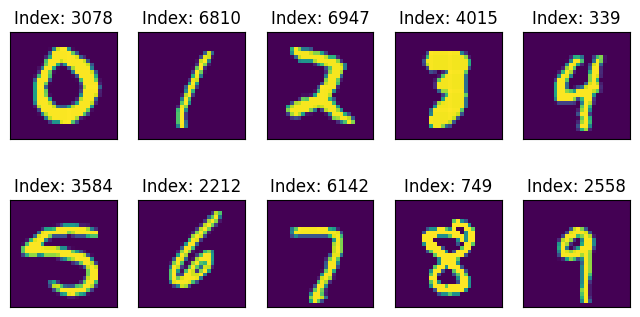

In [52]:
# plot data here (this should have an output)
figure, axes= plt.subplots(2, 5, figsize=(8, 4))
axes = axes.flatten()

for i in range(10):
    randomIndex = np.random.randint(0, len(digits[i]))
    axes[i].imshow(digits[i][randomIndex])
    axes[i].set_title(f'Index: {randomIndex}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()


# (4b) Label data

Select the first 500 examples of 0’s and 1’s for this example, those will form the training data $(x_i , y_i) \in \mathbb{R}^{784} \times \{−1,1\}, i = 1,...,1000$. Assign label $y_i = 1$ for 1s and $y_i = −1$ for 0s.  Also, renormalize your $x_i$ so that the pixel values are floats between 0 and 1, instead of ints from 0 to 255.  You can do this by augmenting the code given above for stacking data from different classes.

In [19]:
# create dataset here (essentially just create a numpy array of 1's and -1's for the labels)
zero500 = digits[0][:500] #Getting the first 500 exampls of 0's
one500 = digits[1][:500] #Getting the first 500 examples of 1's

#Using the tip of creating num[y array of 1's and -1's
zeroLabels = np.full(500, -1)
oneLabels = np.full(500, 1)


newZero = []
for image in zero500:
  flattened_images = image.flatten()
  newZero.append(flattened_images)


newZero = np.vstack(newZero)
newZero = newZero.astype('float32') / 255.0


newOne = []
#Doing the same for the ones
for image in one500:
  flattened_images = image.flatten()
  newOne.append(flattened_images)

newOne = np.vstack(newOne)
newOne = newOne.astype('float32') / 255.0


#Alright time to combine
trainingData = np.vstack((newZero, newOne))
trainingLabel = np.concatenate((zeroLabels, oneLabels))


# (4c) Running Gradient Descent

Implement and run a Gradient Descent algorithm, with step-size $\mu = 10^{-4}$, to optimize the function above associated with this setup. You should run your algorithm for at least $T = 10,000$ iterations, but if your computer can handle it try $T=100,000$ or until a reasonable stopping criterion is satisfied.  Provide a plot showing the value of $F(w)$ at each iteration. Also, feel free to adjust $\mu$ to be larger / smaller if the plot does not match your expectations.

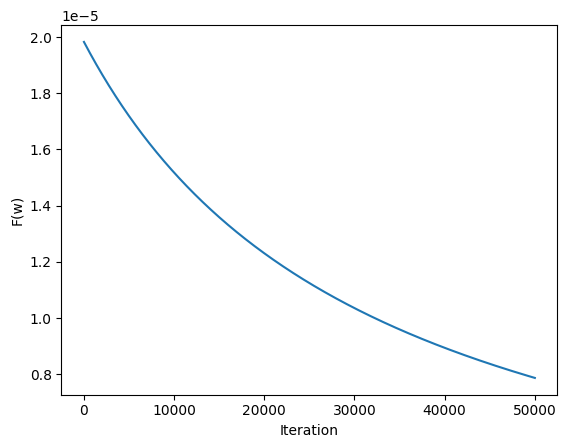

In [28]:
# implement gradient descent here
mu = 1e-3
iterations = 50000

Fvals = []

def F(w):
    N = len(trainingData)  # Number of training samples
    summation = 0

    # Loop through each training example
    for i in range(N):
        x = trainingData[i]
        y = trainingLabel[i]

        # log(1 + exp(-w.T * x_i * y_i))
        exponent = -np.dot(w, x) * y
        summation += np.log(1 + np.exp(exponent))

    return summation / N


def gradientDescent(w):
    N = len(trainingData)
    result = np.zeros(w.shape)

    for i in range(N):
        x = trainingData[i]
        y = trainingLabel[i]

        exponent = np.dot(w, x) * y
        numerator = -y * x
        denominator = np.exp(exponent) + 1

        summationVal = numerator / denominator

        result += summationVal

    return result




for t in range(iterations):
    Fvals.append(F(w))
    gradient = gradientDescent(w)
    w = w - mu * gradient


plt.plot(Fvals)
plt.xlabel('Iteration')
plt.ylabel('F(w)')
plt.show()



# (4d) Discussion about gradient descent

Comment on the resulting plot. In particular, does the shape of $F(w)$ suggest you've successfully converged to a local or global minimum?  Does it appear you chose a good stopping criteria?  Explain whether your
answers to these questions are consistent with the theory we discussed in class (and in the
notes). Be specific i.e., point to a specific theorem (or theorems) and indicate
why it does or does not explain the behavior of the algorithm.  Would the theory dictate a different choice of $\mu$ than the one we used?

I would say that the graph provided is approaching a minimum but has not clearly reached one because it has not fully leveled out yet. I changed the amount of iterations to 50,000 and not 100,000 because it takes to long to load and also to show a more clean and to allow the GD to get closer to the minimum. I changed the mu value to a bigger value so that the convergence can be sped up. I would say that the my answer does follow the idea in class that the GD will steadily reach a global min if we find a small enough mu.

Now, use the $w$ you found from part (a) to classify the first 500 \emph{test} data points associated to
each of the 0 and 1 handwritten digits. Recall that you need to use the function $y = \text{sign}(w^T x)$
to classify. What was the classification error rate associated with the two digits on the test
data (this should be a number between 0 and 1)? What was it on the training data?  Does this relationship make sense?

In [41]:
# Prepare test data for 0's and 1's (flatten and normalize)
testZero = digits[0][500:1000]
testOne = digits[1][500:1000]

newZero = []
for image in testZero:
    flattened_image = image.flatten()
    newZero.append(flattened_image)
newZero = np.vstack(newZero).astype('float32') / 255.0

newOne = []
for image in testOne:
    flattened_image = image.flatten()
    newOne.append(flattened_image)
newOne = np.vstack(newOne).astype('float32') / 255.0

testData = np.vstack((newZero, newOne))
labelData = np.concatenate((np.full(500, -1), np.full(500, 1)))

predict = np.sign(testData @ w)  # y = sign(w.T * x)

errorRate = np.mean(predict != labelData)

trainPredict = np.sign(trainingData @ w)
trainError = np.mean(trainPredict != trainingLabel)

print("The Test error rate is:", errorRate * 100, "%")
print("The Training error rate is", trainError * 100, "%")

print("This relationship makes sense because it represents that the model performs well. The difference is small which means that it is very accurate")




The Test error rate is: 0.1 %
The Training error rate is 0.0 %
This relationship makes sense because it represents that the model performs well. The difference is small which means that it is very accurate
